<a href="https://colab.research.google.com/github/ValdecidaMata/ModeloDifusao/blob/main/C%C3%B3pia_de_ModeloDifus%C3%A3oValdeci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CÉLULA 1 — Instalação e ambiente

In [17]:
# (Colab) Runtime > Change runtime type > GPU (opcional, recomendado)




CÉLULA 2 — Imports e setup

In [18]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


### CÉLULA 1 — Instalação e ambiente: Preparando o Terreno

Esta célula é o nosso ponto de partida, onde garantimos que todas as ferramentas necessárias estejam instaladas e prontas para uso em nosso ambiente Colab. Pense nisso como a preparação de um laboratório antes de um experimento complexo.

```python
# (Colab) Runtime > Change runtime type > GPU (opcional, recomendado)

!pip install torch torchvision matplotlib numpy tqdm
```

-   `!pip install torch torchvision matplotlib numpy tqdm`: Este comando instala as bibliotecas Python que são os pilares do nosso projeto. Permita-me detalhar cada uma:
    -   **`torch`**: A biblioteca principal do PyTorch, uma das frameworks de deep learning mais poderosas e flexíveis. É o "cérebro" por trás da construção e treinamento de nossa rede neural.
    -   **`torchvision`**: Uma biblioteca complementar ao PyTorch, essencial para trabalhar com dados de visão computacional. Ela nos fornecerá conjuntos de dados (como MNIST), modelos pré-treinados e transformações comuns de imagem.
    -   **`matplotlib`**: A biblioteca padrão para a criação de gráficos e visualizações em Python. Usaremos para exibir as imagens geradas pelo nosso modelo.
    -   **`numpy`**: Uma biblioteca fundamental para computação numérica de alto desempenho em Python. PyTorch se integra perfeitamente com NumPy, e é comum usá-los em conjunto.
    -   **`tqdm`**: Uma barra de progresso elegante e fácil de usar. Embora não seja estritamente necessária para a funcionalidade do modelo, ela é inestimável para visualizar o progresso de loops demorados, como o treinamento de um modelo, tornando a experiência do desenvolvedor muito melhor.

**Observação sobre a GPU:** A linha comentada `(Colab) Runtime > Change runtime type > GPU (opcional, recomendado)` é um lembrete crucial. Modelos de difusão, especialmente, são computacionalmente intensivos. Utilizar uma GPU (Graphics Processing Unit) acelera drasticamente os cálculos matriciais e tensores, que são a espinha dorsal do deep learning. No Google Colab, isso significa ir em `Runtime` > `Change runtime type` e selecionar `GPU` como acelerador de hardware. Altamente recomendado para evitar longas esperas!

### CÉLULA 2 — Imports e setup: Montando a Caixa de Ferramentas

Nesta seção, importamos os módulos e funções específicas de cada biblioteca que instalamos. É como abrir sua caixa de ferramentas e organizar as chaves de fenda, martelos e alicates que você sabe que vai precisar para o trabalho.

```python
import math
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
```

Vamos examinar cada importação:

-   **`import math`**: Usado para funções matemáticas como logaritmos e exponenciais, que podem ser necessárias em cálculos específicos (como o `time_embedding`).
-   **`import random`**: Fundamental para operações que requerem aleatoriedade, como a inicialização de sementes para reprodutibilidade e a geração de números aleatórios.
-   **`import numpy as np`**: Importa a biblioteca NumPy com o alias `np`. Embora PyTorch tenha sua própria estrutura de tensores, NumPy ainda é amplamente utilizado para manipulação de arrays e operações numéricas genéricas.
-   **`import matplotlib.pyplot as plt`**: Importa o módulo `pyplot` do Matplotlib com o alias `plt`. Este é o módulo que usaremos para criar e exibir todas as nossas visualizações de gráficos e imagens.

-   **`import torch`**: A biblioteca PyTorch em si. É o coração de nosso modelo, fornecendo as estruturas de dados de tensores e as operações de computação necessárias.
-   **`import torch.nn as nn`**: Contém classes e módulos para construir redes neurais. `nn.Module` é a classe base para todos os módulos de rede neural, e `nn.Linear`, `nn.Conv2d`, etc., são exemplos de camadas que usaremos.
-   **`import torch.nn.functional as F`**: Oferece funções sem estado, como funções de ativação (e.g., `F.relu`), funções de perda (e.g., `F.mse_loss`) e algumas operações de camada que não mantêm parâmetros próprios. É útil para operações que não precisam ser tratadas como módulos com estado.
-   **`from torch.utils.data import DataLoader`**: Uma classe crucial para carregar dados de forma eficiente em lotes (batches) para o treinamento de modelos. Ele gerencia a ordem dos dados (embaralhamento), o carregamento paralelo e a paginação, otimizando o processo de alimentação do modelo.
-   **`from torchvision import datasets, transforms`**: Estas são as ferramentas do `torchvision` que nos permitirão:
    -   **`datasets`**: Acessar facilmente conjuntos de dados populares de visão computacional, como o MNIST, que usaremos para treinar nosso modelo.
    -   **`transforms`**: Aplicar transformações comuns a imagens (como converter para tensor, normalizar, redimensionar), que são essenciais para preparar os dados para a rede neural.

### CÉLULA 3 — Reprodutibilidade e device: Assegurando Consistência e Desempenho

Esta célula estabelece duas práticas muito importantes em deep learning: a **reprodutibilidade** de experimentos e a configuração do **dispositivo de computação** (CPU ou GPU).

```python
def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

seed_everything(42)

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)
```

Vamos desmembrar isso:

-   **`def seed_everything(seed=42):`**: Esta função foi criada para garantir que os resultados do nosso código sejam os mesmos cada vez que o executarmos, desde que as sementes sejam as mesmas e o ambiente seja consistente. Isso é fundamental para depuração, comparação de modelos e validação de resultados de pesquisa. Uma "semente" (seed) é um valor inicial para um gerador de números pseudoaleatórios. Ao fixar a semente, a sequência de números "aleatórios" gerada será sempre a mesma.
    -   `random.seed(seed)`: Seta a semente para o módulo `random` padrão do Python.
    -   `np.random.seed(seed)`: Seta a semente para a biblioteca NumPy.
    -   `torch.manual_seed(seed)`: Seta a semente para o PyTorch na CPU.
    -   `torch.cuda.manual_seed_all(seed)`: Seta a semente para todas as GPUs disponíveis no PyTorch. Esta é essencial quando se usa aceleração por GPU.

-   **`seed_everything(42)`**: Chamamos nossa função para aplicar a semente 42. O número 42 é uma escolha comum e divertida na comunidade de programação, inspirada em `A Hitchhiker's Guide to the Galaxy`.

-   **`device = "cuda" if torch.cuda.is_available() else "cpu"`**: Esta linha de código é uma verificação inteligente. Ela verifica se uma GPU CUDA (NVIDIA) está disponível no sistema (`torch.cuda.is_available()`).
    -   Se uma GPU estiver disponível, a variável `device` será definida como `

`cuda

`, indicando que o modelo e os tensores devem ser movidos para a GPU para computação acelerada.
    -   Se nenhuma GPU CUDA for encontrada, `device` será `

cpu

`, significando que todo o processamento ocorrerá na CPU. Embora funcional, o treinamento na CPU será significativamente mais lento para modelos complexos como os de difusão.

-   **`print("Device:", device)`**: Simplesmente imprime qual dispositivo (GPU ou CPU) está sendo utilizado, confirmando a configuração.

### CÉLULA 4 — Dataset (MNIST): A Fonte dos Nossos Dados

Aqui, preparamos o nosso conjunto de dados para que o modelo possa aprender a partir dele. Estamos usando o famoso dataset MNIST, que consiste em imagens de dígitos escritos à mão. É o "Hello World" da visão computacional e uma excelente escolha para demonstrar modelos de difusão devido à sua simplicidade.

```python
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

loader = DataLoader(dataset, batch_size=128, shuffle=True)
```

Vamos analisar os passos:

-   **`transform = transforms.Compose([...])`**: Criamos uma sequência de transformações que serão aplicadas a cada imagem do dataset antes que ela seja alimentada ao modelo. `transforms.Compose` permite encadear várias transformações.
    -   **`transforms.ToTensor()`**: Esta transformação é essencial. Ela converte as imagens do dataset, que normalmente estão no formato PIL (Python Imaging Library) ou NumPy, em tensores PyTorch. Além disso, ela escala os valores dos pixels de um intervalo de `[0, 255]` (inteiros) para `[0.0, 1.0]` (floats), que é o formato preferido para entradas de redes neurais.
    -   **`transforms.Normalize((0.5,), (0.5,))`**: Esta transformação normaliza os valores dos pixels dos tensores. Para uma imagem em escala de cinza (como MNIST), ela subtrai 0.5 de cada pixel e depois divide por 0.5. Isso efetivamente move a faixa de valores dos pixels de `[0.0, 1.0]` para `[-1.0, 1.0]`. A normalização é uma prática comum para ajudar a rede neural a aprender de forma mais eficaz e estável, pois centraliza os dados e os coloca em uma escala consistente.

-   **`dataset = datasets.MNIST(...)`**: Instanciamos o conjunto de dados MNIST.
    -   `root="./data"`: Especifica o diretório onde os dados do MNIST serão baixados e armazenados.
    -   `train=True`: Indica que queremos a parte de treinamento do dataset.
    -   `download=True`: Se o dataset não estiver presente no diretório `root`, ele será baixado automaticamente.
    -   `transform=transform`: Aplica as transformações que definimos anteriormente a cada imagem carregada do dataset.

-   **`loader = DataLoader(dataset, batch_size=128, shuffle=True)`**: Criamos um `DataLoader`, que é um iterador que nos permite carregar os dados em "lotes" (batches). Este é um conceito central em deep learning:
    -   `dataset`: O conjunto de dados que o `DataLoader` irá carregar.
    -   `batch_size=128`: Em vez de alimentar uma imagem de cada vez para o modelo, alimentamos 128 imagens simultaneamente. Isso é mais eficiente para o hardware (especialmente GPUs) e ajuda a suavizar o gradiente durante o treinamento, levando a um aprendizado mais estável.
    -   `shuffle=True`: Antes de cada época de treinamento, os dados no dataset serão embaralhados. Isso é crucial para evitar que o modelo aprenda a ordem dos dados e para garantir que ele veja uma variedade de exemplos em cada lote, o que melhora a generalização.

### CÉLULA 5 — Noise schedule (β, α, ᾱ): A Coreografia do Ruído

Esta célula define o que chamamos de "schedule de ruído" (noise schedule), que é fundamental para a operação de um modelo de difusão. Ele dita como o ruído é adicionado e removido das imagens ao longo do tempo. É a "receita" para a transformação de uma imagem clara em ruído puro e vice-versa.

```python
T = 200
beta_start = 1e-4
beta_end = 0.02

beta = torch.linspace(beta_start, beta_end, T).to(device)
alpha = 1.0 - beta
alpha_bar = torch.cumprod(alpha, dim=0)
```

Vamos detalhar cada componente:

-   **`T = 200`**: `T` representa o número total de passos de difusão. Em um modelo de difusão, transformamos uma imagem de dados em ruído puro em `T` passos. Durante o processo reverso (geração), removemos o ruído em `T` passos para ir do ruído puro à imagem de dados. Um `T` maior geralmente permite um processo de difusão mais suave, mas também aumenta o tempo de computação.

-   **`beta_start = 1e-4`** e **`beta_end = 0.02`**: Estes são os valores inicial e final para o parâmetro `beta`. `beta` é uma sequência que controla a quantidade de ruído adicionado em cada passo do processo de difusão *forward* (para frente). Normalmente, `beta` aumenta linearmente ao longo dos passos, começando com um valor pequeno (`beta_start`) e terminando com um valor maior (`beta_end`). Isso significa que adicionamos um pouco de ruído no início e mais ruído nos passos finais, garantindo que a imagem se torne ruído puro no final do processo.

-   **`beta = torch.linspace(beta_start, beta_end, T).to(device)`**: Esta linha cria um tensor `beta` que varia linearmente de `beta_start` a `beta_end` em `T` passos. O `.to(device)` garante que este tensor seja armazenado no mesmo dispositivo (CPU ou GPU) que o restante do nosso modelo e dados, o que é crucial para evitar erros de incompatibilidade de dispositivo.

-   **`alpha = 1.0 - beta`**: `alpha` é outro parâmetro derivado de `beta`. Ele mede a "preservação de sinal" em cada passo. Se `beta` é a quantidade de ruído adicionado, `alpha` é a fração do sinal original que permanece. Se `beta` aumenta, `alpha` diminui, significando que menos do sinal original permanece à medida que mais ruído é adicionado.

-   **`alpha_bar = torch.cumprod(alpha, dim=0)`**: `alpha_bar` (pronuncia-se "alfa barra") é o produto cumulativo de `alpha`. Este é um termo crucial que nos permite calcular o estado da imagem (com ruído) em qualquer passo `t` *diretamente* a partir da imagem original `x0`, sem precisar aplicar o ruído passo a passo. Ele representa a fração total do sinal original que resta após `t` passos de difusão. É uma otimização matemática que torna o processo de difusão mais eficiente para o treinamento.

### CÉLULA 6 — Função auxiliar (time embedding): Codificando o Tempo

Um dos desafios em modelos de difusão é informar à rede neural em qual "passo de tempo" (`t`) ela está operando. A rede precisa saber se está lidando com uma imagem pouco ruidosa (início do processo de difusão) ou uma imagem muito ruidosa (final do processo). É aí que entra o `time embedding`.

```python
def time_embedding(t, dim=64):
    half = dim // 2
    emb = math.log(10000) / (half - 1)
    emb = torch.exp(torch.arange(half, device=device) * -emb)
    emb = t[:, None] * emb[None, :]
    emb = torch.cat((torch.sin(emb), torch.cos(emb)), dim=1)
    return emb
```

Vamos entender esta função, que é inspirada nos *Positional Embeddings* encontrados em arquiteturas de Transformers:

-   **Propósito**: Esta função converte um número escalar representando o passo de tempo (`t`) em um vetor de alta dimensão (`dim`). Este vetor contém informações sobre a posição (o tempo `t`) de uma forma que a rede neural pode interpretar de maneira eficaz. Isso é mais robusto do que simplesmente passar `t` como um escalar, pois permite que a rede aprenda relações complexas baseadas no tempo.

-   **`half = dim // 2`**: Calcula a metade da dimensão desejada para o embedding. O embedding final será `dim`, mas construiremos usando `half` componentes de seno e `half` componentes de cosseno.

-   **`emb = math.log(10000) / (half - 1)`**: Calcula uma constante base para as frequências. O `10000` é um valor mágico comum usado em positional embeddings, permitindo que as frequências variem em uma ampla gama logarítmica.

-   **`emb = torch.exp(torch.arange(half, device=device) * -emb)`**: Aqui, criamos as frequências. `torch.arange(half)` gera uma sequência de `0` a `half-1`. Multiplicamos por `-emb` e aplicamos a exponencial para obter uma série de frequências decrescentes. Estas frequências são então usadas para gerar ondas senoidais e cossenoidais.

-   **`emb = t[:, None] * emb[None, :]`**: Esta linha realiza uma multiplicação externa entre o tensor de tempo `t` (que é uma lista de passos de tempo para um lote de imagens) e o tensor de frequências que acabamos de criar. O `[:, None]` e `[None, :]` são operações de `unsqueezing` que adicionam uma nova dimensão, permitindo que a multiplicação broadcasting ocorra corretamente, resultando em um tensor onde cada linha corresponde a um passo de tempo e cada coluna a uma frequência.

-   **`emb = torch.cat((torch.sin(emb), torch.cos(emb)), dim=1)`**: Esta é a parte central do `positional embedding`. Aplicamos as funções seno e cosseno ao tensor resultante da etapa anterior e então concatenamos (juntamos) esses dois conjuntos de valores. Isso cria um vetor de embedding que tem `dim` componentes (metade seno, metade cosseno) para cada passo de tempo `t`. A combinação de seno e cosseno permite que o modelo capture relações periódicas e não-periódicas no tempo de forma robusta.

-   **`return emb`**: A função retorna o tensor de embedding de tempo, pronto para ser integrado à rede neural.

In [19]:
%%writefile app.py
import streamlit as st
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# Definições do Modelo e Funções Auxiliares (do notebook)
# -----------------------------------------------------------

# Reproduzibilidade e device
# Não precisamos da função seed_everything para o Streamlit,
# pois não estamos treinando, mas manter a definição de device é importante.
device = "cuda" if torch.cuda.is_available() else "cpu"
# For Streamlit deployment, often 'cpu' is more stable or required if no GPU is available.
# Let's explicitly set to 'cpu' for wider compatibility unless a GPU is guaranteed.
# device = "cpu" # Uncomment this line if deploying on a CPU-only environment

# CÉLULA 5 — Noise schedule (β, α, ᾱ)
# Estes são carregados do checkpoint, mas precisamos de valores iniciais ou placeholders
# para que o script possa iniciar antes do checkpoint ser carregado.
# Para a aplicação Streamlit, eles serão carregados do checkpoint, mas as definições globais
# são úteis para inicialização e clareza.
T = 200 # Este será sobrescrito pelo checkpoint
beta_start = 1e-4 # Este será sobrescrito pelo checkpoint
beta_end = 0.02 # Este será sobrescrito pelo checkpoint

# Inicialização de beta, alpha, alpha_bar com valores padrão para que o script não quebre antes do carregamento do checkpoint
beta = torch.linspace(beta_start, beta_end, T).to(device)
alpha = 1.0 - beta
alpha_bar = torch.cumprod(alpha, dim=0)

# CÉLULA 6 — Função auxiliar (time embedding)
def time_embedding(t, dim=64):
    half = dim // 2
    emb = math.log(10000) / (half - 1)
    emb = torch.exp(torch.arange(half, device=device) * -emb)
    emb = t[:, None] * emb[None, :]
    emb = torch.cat((torch.sin(emb), torch.cos(emb)), dim=1)
    return emb

# CÉLULA 7 — MiniUNet (modelo didático)
class MiniUNet(nn.Module):
    def __init__(self, time_dim=64):
        super().__init__()
        self.time_mlp = nn.Sequential(
            nn.Linear(time_dim, time_dim),
            nn.ReLU()
        )

        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 1, 3, padding=1)

    def forward(self, x, t):
        t_emb = self.time_mlp(time_embedding(t, 64)).view(-1, 64, 1, 1)
        h = F.relu(self.conv1(x))
        h = h + t_emb[:, :32]
        h = F.relu(self.conv2(h))
        return self.conv3(h)

# CÉLULA 8 — Forward process (adição de ruído) - Incluído para completude, mas não usado diretamente no sampling
def forward_diffusion(x0, t):
    noise = torch.randn_like(x0)
    a_bar = alpha_bar[t].view(-1, 1, 1, 1)
    xt = torch.sqrt(a_bar) * x0 + torch.sqrt(1 - a_bar) * noise
    return xt, noise

# CÉLULA 10 — Sampling reverso (geração)
@torch.no_grad()
def sample(model, n=16):
    model.eval()
    x = torch.randn(n, 1, 28, 28).to(device)
    for t_step in reversed(range(T)):
        t_batch = torch.full((n,), t_step, device=device, dtype=torch.long)
        eps = model(x, t_batch)
        a = alpha[t_step]
        a_bar = alpha_bar[t_step]
        x = (x - (1 - a) / torch.sqrt(1 - a_bar) * eps) / torch.sqrt(a)
        if t_step > 0: # Adiciona ruído apenas para t > 0
            x += torch.sqrt(beta[t_step]) * torch.randn_like(x)
    return x

# -----------------------------------------------------------
# Aplicativo Streamlit
# -----------------------------------------------------------

st.set_page_config(page_title="Gerador de Dígitos MNIST com Difusão")
st.title("Gerador de Dígitos MNIST com Modelos de Difusão")

st.write("""
Este aplicativo demonstra um modelo de difusão treinado para gerar dígitos semelhantes aos do conjunto de dados MNIST.
O modelo começa com ruído puro e, em `T` passos, gradualmente "remove" o ruído para revelar um dígito.
""")

# Carregar o modelo
@st.cache_resource
def load_model():
    model = MiniUNet().to(device)
    try:
        checkpoint = torch.load("mini_difusao_mnist.pth", map_location=device)
        model.load_state_dict(checkpoint["model_state"])

        # Atualiza os parâmetros de difusão globais
        global T, beta_start, beta_end, beta, alpha, alpha_bar
        T = checkpoint["T"]
        beta_start = checkpoint["beta_start"]
        beta_end = checkpoint["beta_end"]
        beta = torch.linspace(beta_start, beta_end, T).to(device)
        alpha = 1.0 - beta
        alpha_bar = torch.cumprod(alpha, dim=0)

        st.success(f"Modelo e parâmetros de difusão carregados com sucesso de mini_difusao_mnist.pth! (T={T})")
        return model
    except FileNotFoundError:
        st.error("O arquivo 'mini_difusao_mnist.pth' não foi encontrado. Por favor, certifique-se de que o checkpoint está no mesmo diretório do 'app.py'.")
        st.stop()
    except Exception as e:
        st.error(f"Erro ao carregar o checkpoint: {e}")
        st.stop()

model = load_model()

st.sidebar.header("Opções de Geração")
num_images = st.sidebar.slider("Número de Imagens para Gerar", 1, 16, 4)

if st.sidebar.button("Gerar Imagens"):
    with st.spinner(f"Gerando {num_images} imagens..."):
        generated_samples = sample(model, n=num_images).cpu()

    st.subheader(f"Imagens Geradas ({num_images} dígitos MNIST)")

    # Exibição das imagens
    fig, axes = plt.subplots(
        math.ceil(num_images / 4), # número de linhas
        min(num_images, 4),      # número de colunas (máx. 4 por linha)
        figsize=(min(num_images, 4) * 2, math.ceil(num_images / 4) * 2) # ajusta o tamanho da figura
    )
    axes = axes.flatten() if num_images > 1 else [axes] # Garante que 'axes' é um array para iteração

    for i in range(num_images):
        axes[i].imshow(generated_samples[i].squeeze(), cmap="gray")
        axes[i].axis("off")

    # Ocultar eixos extras se num_images não preencher todas as subplots
    for j in range(num_images, len(axes)):
        axes[j].axis("off")

    st.pyplot(fig)
    plt.close(fig)

st.sidebar.markdown("---")
st.sidebar.info("Desenvolvido para demonstrar a geração de imagens com modelos de difusão.")

st.markdown("---")
st.markdown("### Como executar este aplicativo:")
st.markdown("""
1.  **Salve este código** como `app.py` no mesmo diretório onde `mini_difusao_mnist.pth` está.
2.  **Abra o terminal** e navegue até este diretório.
3.  **Execute o comando**: `streamlit run app.py`
4.  O Streamlit abrirá um tab no seu navegador com o aplicativo.
""")
st.markdown("---")

Overwriting app.py


### CÉLULA 7 — MiniUNet (modelo didático): A Espinha Dorsal da Denoising

Esta célula define a arquitetura da nossa rede neural, que chamamos de `MiniUNet`. Em modelos de difusão, a rede neural tem a tarefa crucial de *prever o ruído* presente em uma imagem ruidosa em um determinado passo de tempo. Ao subtrair esse ruído previsto, o modelo pode gradualmente "limpar" a imagem até revelar os dados originais.

O nome `UNet` vem de sua forma em 'U' quando visualizada, com um caminho de contração (encoder) e um caminho de expansão (decoder) conectados por conexões residuais (skip connections). Nossa `MiniUNet` é uma versão simplificada dessa arquitetura, adequada para o dataset MNIST.

```python
class MiniUNet(nn.Module):
    def __init__(self, time_dim=64):
        super().__init__()
        self.time_mlp = nn.Sequential(
            nn.Linear(time_dim, time_dim),
            nn.ReLU()
        )

        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 1, 3, padding=1)

    def forward(self, x, t):
        t_emb = self.time_mlp(time_embedding(t, 64)).view(-1, 64, 1, 1)
        h = F.relu(self.conv1(x))
        h = h + t_emb[:, :32]
        h = F.relu(self.conv2(h))
        return self.conv3(h)
```

Vamos detalhar a classe `MiniUNet`:

-   **`class MiniUNet(nn.Module):`**: Declara nossa classe de rede neural, que herda de `nn.Module` do PyTorch. Isso é padrão para qualquer rede neural que você constrói em PyTorch, permitindo que ela gerencie seus parâmetros e o processo de forward/backward.

-   **`def __init__(self, time_dim=64):`**: O construtor da classe, onde definimos as camadas (módulos) da rede.
    -   `super().__init__()`: Chama o construtor da classe pai (`nn.Module`).
    -   **`self.time_mlp = nn.Sequential(...)`**: Define uma pequena *Multi-Layer Perceptron* (MLP) para processar o embedding de tempo. Lembre-se que o `time_embedding` (da Célula 6) já nos dá um vetor `time_dim` de comprimento. Esta `time_mlp` pega esse vetor, passa por uma camada linear (`nn.Linear`) e uma função de ativação ReLU (`nn.ReLU`), permitindo que a rede aprenda a extrair características mais ricas do embedding de tempo.
    -   **`self.conv1 = nn.Conv2d(1, 32, 3, padding=1)`**: A primeira camada convolucional. Ela pega a imagem de entrada (que tem 1 canal, pois MNIST é em escala de cinza) e a transforma em 32 mapas de características (feature maps) usando um kernel de 3x3 e padding de 1 (para manter o tamanho da imagem).
    -   **`self.conv2 = nn.Conv2d(32, 32, 3, padding=1)`**: Uma segunda camada convolucional, que processa os 32 mapas de características da `conv1` e produz novamente 32 mapas de características.
    -   **`self.conv3 = nn.Conv2d(32, 1, 3, padding=1)`**: A camada convolucional de saída. Ela pega os 32 mapas de características finais e os transforma de volta em 1 canal de saída. Este 1 canal de saída representará o ruído previsto que a rede estima ter sido adicionado à imagem.

-   **`def forward(self, x, t):`**: Define como os dados fluem através da rede. `x` é a imagem ruidosa de entrada, e `t` é o passo de tempo atual.
    -   **`t_emb = self.time_mlp(time_embedding(t, 64)).view(-1, 64, 1, 1)`**: Primeiro, geramos o embedding de tempo usando a função `time_embedding`. Em seguida, passamos este embedding pela `self.time_mlp` que definimos. O `.view(-1, 64, 1, 1)` remodela o tensor de embedding para que ele possa ser somado aos mapas de características convolucionais. O formato `(batch_size, channels, height, width)` é o esperado para tensores de imagem, e ao ter `1, 1` para height/width, ele pode ser transmitido (broadcast) para todas as posições espaciais dos mapas de características.
    -   **`h = F.relu(self.conv1(x))`**: A imagem de entrada `x` é passada pela primeira camada convolucional (`self.conv1`), e a saída é então ativada por uma função ReLU (`F.relu`). ReLU (Rectified Linear Unit) introduz não-linearidade na rede, permitindo que ela aprenda padrões mais complexos.
    -   **`h = h + t_emb[:, :32]`**: **Esta é a conexão crucial entre o embedding de tempo e o caminho principal da rede!** O embedding de tempo (`t_emb`) é somado aos mapas de características (`h`) após a primeira convolução. Isso permite que a rede "saiba" em que passo de tempo ela está e ajuste sua previsão de ruído de acordo. Notamos que `t_emb` tem 64 canais, e `h` tem 32. Aqui, somamos apenas os primeiros 32 canais do `t_emb` a `h` (uma simplificação para este `MiniUNet` didático). Em um UNet completo, o embedding de tempo é tipicamente adicionado em múltiplos pontos da rede.
    -   **`h = F.relu(self.conv2(h))`**: A saída (agora com a informação de tempo incorporada) é passada pela segunda camada convolucional e novamente ativada por ReLU.
    -   **`return self.conv3(h)`**: Finalmente, a saída da segunda camada convolucional é passada pela camada convolucional de saída (`self.conv3`). O resultado é a previsão do ruído (`eps`) que o modelo estima estar presente na imagem `x` no tempo `t`.

### CÉLULA 8 — Forward process (adição de ruído): Simulando a Natureza do Ruído

Esta célula define a função essencial para o "processo de difusão forward" (para frente). Este processo descreve como uma imagem limpa (`x0`) é gradualmente transformada em ruído puro ao longo de `T` passos de tempo. No treinamento de um modelo de difusão, simulamos esse processo para gerar imagens ruidosas e seus ruídos correspondentes, que o modelo tentará aprender a prever.

```python
def forward_diffusion(x0, t):
    noise = torch.randn_like(x0)
    a_bar = alpha_bar[t].view(-1, 1, 1, 1)
    xt = torch.sqrt(a_bar) * x0 + torch.sqrt(1 - a_bar) * noise
    return xt, noise
```

Vamos entender o que acontece aqui:

-   **Propósito**: A função `forward_diffusion` pega uma imagem original `x0` e um passo de tempo `t` e retorna uma versão ruidosa dessa imagem (`xt`) no passo `t`, junto com o ruído que foi adicionado (`noise`). O ponto chave é que ela não simula os `t` passos sequencialmente; em vez disso, ela usa a propriedade matemática de `alpha_bar` para pular diretamente para o passo `t`.

-   **`noise = torch.randn_like(x0)`**: Geramos um tensor de ruído aleatório. `torch.randn_like(x0)` cria um tensor com a mesma forma e tipo de dados que `x0`, preenchido com números de uma distribuição normal padrão (média 0, desvio padrão 1). Este `noise` representa o ruído puro que, combinado com a imagem original, forma `xt`.

-   **`a_bar = alpha_bar[t].view(-1, 1, 1, 1)`**: Recuperamos o valor de `alpha_bar` (produto cumulativo de `alpha`) para o passo de tempo `t` atual. Lembre-se que `alpha_bar` foi calculado na Célula 5. O `.view(-1, 1, 1, 1)` remodela este escalar para um tensor com 4 dimensões. Isso é necessário para que ele possa ser multiplicado por tensores de imagem (`x0` e `noise`), que tipicamente têm o formato `(batch_size, channels, height, width)`, através de `broadcasting`.

-   **`xt = torch.sqrt(a_bar) * x0 + torch.sqrt(1 - a_bar) * noise`**: Esta é a **fórmula central do processo de difusão forward**. Ela descreve como uma imagem `x0` é ruidosa para se tornar `xt` no passo de tempo `t`. Permita-me explicar os termos:
    -   `torch.sqrt(a_bar) * x0`: Esta parte representa a contribuição da imagem original (`x0`) para a imagem ruidosa `xt`. À medida que `t` aumenta, `a_bar` diminui (pois mais ruído foi adicionado cumulativamente), então `torch.sqrt(a_bar)` também diminui. Isso significa que a influência da imagem original diminui com o tempo.
    -   `torch.sqrt(1 - a_bar) * noise`: Esta parte representa a contribuição do ruído (`noise`) para a imagem ruidosa `xt`. Conforme `t` aumenta, `1 - a_bar` aumenta (pois mais ruído foi adicionado), então `torch.sqrt(1 - a_bar)` também aumenta. Isso significa que a influência do ruído aumenta com o tempo.
    -   Em essência, esta fórmula realiza uma interpolação ponderada entre a imagem original e o ruído puro, onde os pesos são determinados por `alpha_bar[t]`. Em passos de tempo iniciais (pequenos `t`), `a_bar` é próximo de 1, então `xt` é muito parecido com `x0`. Em passos de tempo finais (grandes `t`), `a_bar` é próximo de 0, então `xt` é muito parecido com `noise`.

-   **`return xt, noise`**: A função retorna a imagem ruidosa `xt` e o `noise` original que foi usado para criá-la. O `noise` é o "alvo" que nosso modelo `MiniUNet` tentará prever durante o treinamento.

### CÉLULA 9 — Treinamento: Ensinando o Modelo a Ver o Ruído

Esta é a seção onde a mágica do aprendizado acontece! O modelo `MiniUNet` é treinado para prever o ruído adicionado às imagens. O objetivo é que, dada uma imagem ruidosa (`xt`) e seu respectivo passo de tempo (`t`), o modelo retorne uma previsão do ruído (`noise_pred`) que seja o mais próximo possível do ruído real (`noise`) que foi usado para corromper a imagem original.

```python
model = MiniUNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

epochs = 5

for epoch in range(epochs):
    for x, _ in loader:
        x = x.to(device)
        t = torch.randint(0, T, (x.size(0),), device=device)

        xt, noise = forward_diffusion(x, t)
        noise_pred = model(xt, t)

        loss = F.mse_loss(noise_pred, noise)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs} | Loss: {loss.item():.4f}")
```

Vamos detalhar o processo de treinamento:

-   **`model = MiniUNet().to(device)`**: Primeiro, instanciamos nossa rede neural `MiniUNet`. O `.to(device)` move todos os parâmetros do modelo (pesos e vieses das camadas) para o dispositivo selecionado (GPU ou CPU), garantindo que as computações ocorram no hardware apropriado.

-   **`optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)`**: Definimos o otimizador. Otimizadores são algoritmos que ajustam os parâmetros do modelo para minimizar a função de perda. Aqui, usamos o otimizador **Adam**, que é muito popular e eficaz para uma ampla gama de tarefas de deep learning.
    -   `model.parameters()`: Informa ao otimizador quais parâmetros ele deve ajustar.
    -   `lr=1e-3`: Define a taxa de aprendizado (learning rate) como 0.001. A taxa de aprendizado controla o quão grandes são os passos dados nos ajustes dos parâmetros a cada iteração.

-   **`epochs = 5`**: Definimos o número de "épocas" de treinamento. Uma época representa uma passagem completa por todo o conjunto de dados de treinamento. Em outras palavras, o modelo verá cada imagem do dataset 5 vezes (em média, devido ao embaralhamento dos lotes).

-   **`for epoch in range(epochs):`**: Inicia o loop principal de épocas.

-   **`for x, _ in loader:`**: Dentro de cada época, iteramos sobre os lotes de dados fornecidos pelo `DataLoader` (Célula 4).
    -   `x`: Contém o lote de imagens originais (limpas).
    -   `_`: Ignoramos os rótulos (neste caso, os dígitos de 0 a 9 do MNIST), pois nosso modelo de difusão não os utiliza para treinamento. Ele aprende a prever o ruído, não a classificar dígitos.

-   **`x = x.to(device)`**: Move as imagens do lote atual para o dispositivo de computação (GPU ou CPU). Isso é crucial para que os dados estejam no mesmo dispositivo que o modelo.

-   **`t = torch.randint(0, T, (x.size(0),), device=device)`**: Para cada imagem no lote, selecionamos aleatoriamente um passo de tempo `t` entre `0` e `T-1`. Isso é importante porque o modelo precisa aprender a prever o ruído em *qualquer* passo de tempo, não apenas em uma sequência fixa. `x.size(0)` nos dá o tamanho do lote.

-   **`xt, noise = forward_diffusion(x, t)`**: Chamamos nossa função `forward_diffusion` (Célula 8) para gerar as versões ruidosas das imagens (`xt`) e também obter o ruído real (`noise`) que foi adicionado. O modelo tentará aprender a prever este `noise`.

-   **`noise_pred = model(xt, t)`**: Esta é a etapa de "inferência" (forward pass) do nosso modelo. Alimentamos a imagem ruidosa `xt` e o passo de tempo `t` ao `MiniUNet`. O modelo processa esses inputs e retorna sua *previsão do ruído* (`noise_pred`).

-   **`loss = F.mse_loss(noise_pred, noise)`**: Calculamos a função de perda (loss function). Usamos `F.mse_loss`, que é a *Mean Squared Error* (Erro Quadrático Médio). Esta função mede a diferença quadrática média entre o ruído previsto pelo modelo (`noise_pred`) e o ruído real (`noise`). Nosso objetivo é minimizar essa diferença.

-   **`optimizer.zero_grad()`**: Antes de calcular novos gradientes, zeramos quaisquer gradientes acumulados de iterações anteriores. Isso é crucial para evitar que gradientes antigos interfiram nos novos.

-   **`loss.backward()`**: Esta é a etapa de "backpropagation". O PyTorch calcula automaticamente os gradientes da função de perda em relação a *todos* os parâmetros treináveis do modelo. Esses gradientes indicam a direção e a magnitude em que cada parâmetro deve ser ajustado para diminuir a perda.

-   **`optimizer.step()`**: O otimizador usa os gradientes calculados por `loss.backward()` para atualizar os parâmetros do modelo. Ele move os parâmetros na direção oposta ao gradiente, na esperança de encontrar um ponto de perda menor.

-   **`print(f"Epoch {epoch+1}/{epochs} | Loss: {loss.item():.4f}")`**: Ao final de cada época, imprimimos a perda da *última* iteração da época. Isso nos dá uma ideia de como o modelo está aprendendo ao longo do tempo. Esperamos que o valor da perda diminua à medida que o treinamento avança.

### CÉLULA 10 — Sampling reverso (geração): Transformando Ruído em Imagens

Esta é a função mais emocionante, pois é onde o modelo de difusão demonstra sua capacidade generativa! Depois de ter treinado o `MiniUNet` para prever o ruído, agora podemos usá-lo para realizar o processo de difusão reverso (backward diffusion) ou "sampling", que transforma um tensor de ruído puro em uma imagem coerente. É o oposto exato do que o processo forward faz.

```python
@torch.no_grad()
def sample(model, n=16):
    model.eval()
    x = torch.randn(n, 1, 28, 28).to(device)
    for t in reversed(range(T)):
        t_batch = torch.full((n,), t, device=device, dtype=torch.long)
        eps = model(x, t_batch)
        a = alpha[t]
        a_bar = alpha_bar[t]
        x = (x - (1 - a) / torch.sqrt(1 - a_bar) * eps) / torch.sqrt(a)
        if t > 0:
            x += torch.sqrt(beta[t]) * torch.randn_like(x)
    return x
```

Vamos entender o processo passo a passo:

-   **`@torch.no_grad()`**: Este decorador é fundamental. Ele indica que o bloco de código a seguir não precisa calcular gradientes para backpropagation. Durante a geração (sampling), não estamos treinando o modelo, então não há necessidade de rastrear as operações para calcular gradientes. Isso economiza memória e acelera a computação.

-   **`def sample(model, n=16):`**: Define a função de amostragem.
    -   `model`: O `MiniUNet` treinado.
    -   `n`: O número de imagens que queremos gerar.

-   **`model.eval()`**: Coloca o modelo em modo de avaliação. Isso é importante porque algumas camadas (como `Dropout` ou `BatchNorm`) se comportam de maneira diferente durante o treinamento e a avaliação. No modo `eval`, elas usam médias e variâncias congeladas, garantindo resultados consistentes durante a inferência.

-   **`x = torch.randn(n, 1, 28, 28).to(device)`**: Começamos com ruído puro. Criamos um lote de `n` tensores, cada um com 1 canal e dimensões 28x28 (o mesmo tamanho das imagens MNIST), preenchidos com números aleatórios de uma distribuição normal padrão. Este é o nosso ponto de partida totalmente ruidoso.

-   **`for t in reversed(range(T)):`**: Este é o loop central do processo de difusão reverso. Iteramos de `T-1` até `0` (inclusive). Em cada passo, removemos gradualmente uma pequena quantidade de ruído.
    -   **`t_batch = torch.full((n,), t, device=device, dtype=torch.long)`**: Criamos um tensor de `n` elementos, todos com o valor do passo de tempo `t` atual. Isso é passado para o modelo para que ele saiba em qual estágio de denoising está.
    -   **`eps = model(x, t_batch)`**: Alimentamos a imagem atual (`x`, que é ruidosa) e o passo de tempo `t_batch` ao nosso modelo treinado. O modelo retorna sua *previsão do ruído* (`eps`) presente em `x`.
    -   **`a = alpha[t]`** e **`a_bar = alpha_bar[t]`**: Recuperamos os valores de `alpha` e `alpha_bar` para o passo de tempo `t` atual, que são essenciais para a fórmula de denoising.
    -   **`x = (x - (1 - a) / torch.sqrt(1 - a_bar) * eps) / torch.sqrt(a)`**: Esta é a **fórmula de denoising** central do processo de difusão reverso. É a manipulação matemática que nos permite remover o ruído previsto para obter uma imagem "um pouco menos ruidosa" (`x`) no passo `t-1`.
        -   `x - (1 - a) / torch.sqrt(1 - a_bar) * eps`: Subtrai a contribuição do ruído previsto (`eps`) da imagem ruidosa atual (`x`). Os termos `(1 - a) / torch.sqrt(1 - a_bar)` são fatores de escala matematicamente derivados que garantem que a subtração do ruído seja feita corretamente.
        -   `/ torch.sqrt(a)`: Este termo é uma re-escala para garantir que a variância da imagem após a remoção do ruído seja consistente com o que se esperaria no passo de tempo `t-1`.
    -   **`if t > 0: x += torch.sqrt(beta[t]) * torch.randn_like(x)`**: Este é um termo de "re-introdução de ruído estocástico". Em cada passo de denoising, além de remover o ruído previsto, adicionamos uma *pequena quantidade de ruído aleatório* novamente. Isso é crucial para a qualidade e diversidade das amostras geradas. Sem este ruído adicionado, as imagens geradas tenderiam a ser menos diversas e mais borradas. `torch.sqrt(beta[t])` atua como um fator de escala para este ruído, controlando sua magnitude, e `torch.randn_like(x)` gera novo ruído aleatório.

-   **`return x`**: Após `T` passos de denoising, o tensor `x` original (que começou como ruído puro) terá sido transformado nas `n` imagens geradas pelo modelo.

### CÉLULA 11 — Visualização: Exibindo as Criações do Nosso Modelo

Depois de todo o treinamento e do intrincado processo de geração, é hora de ver o que o nosso modelo de difusão é capaz de criar! Esta célula utiliza a biblioteca `matplotlib` para exibir as imagens que acabamos de amostrar do modelo.

```python
samples = sample(model, n=16).cpu()

plt.figure(figsize=(4,4))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(samples[i].squeeze(), cmap="gray")
    plt.axis("off")
plt.show()
```

Vamos entender o que cada linha faz:

-   **`samples = sample(model, n=16).cpu()`**: Primeiro, chamamos a função `sample` (que definimos na Célula 10) para gerar 16 novas imagens (`n=16`) usando nosso `model` treinado. O `.cpu()` é fundamental aqui: se o modelo foi executado na GPU, os tensores resultantes (`samples`) ainda estarão na GPU. Para visualizá-los com `matplotlib` (que geralmente opera com dados NumPy na CPU), precisamos movê-los de volta para a CPU.

-   **`plt.figure(figsize=(4,4))`**: Cria uma nova figura para o nosso gráfico, com um tamanho de 4x4 polegadas. Isso define as dimensões gerais da área onde nossas imagens serão exibidas.

-   **`for i in range(16):`**: Inicia um loop para iterar 16 vezes, uma para cada imagem gerada.

-   **`plt.subplot(4,4,i+1)`**: Cria uma sub-plotagem dentro da figura. `plt.subplot(linhas, colunas, índice)` divide a figura em uma grade de `linhas` por `colunas` e seleciona a sub-plotagem no `índice` especificado (começando em 1). Aqui, criamos uma grade 4x4 e colocamos cada imagem gerada em sua respectiva posição.

-   **`plt.imshow(samples[i].squeeze(), cmap="gray")`**: Exibe a imagem atual na sub-plotagem.
    -   `samples[i]`: Seleciona a i-ésima imagem do lote de amostras.
    -   `.squeeze()`: Remove dimensões de tamanho 1 do tensor. Nossas imagens MNIST são `(1, 28, 28)`. `squeeze()` transforma isso em `(28, 28)`, que é o formato esperado por `imshow` para imagens em escala de cinza.
    -   `cmap="gray"`: Especifica o mapa de cores a ser usado. Para imagens em escala de cinza como o MNIST, "gray" é a escolha apropriada, mostrando os pixels em tons de cinza.

-   **`plt.axis("off")`**: Remove os eixos x e y (com suas ticks e rótulos) da sub-plotagem. Isso é útil para exibir apenas a imagem, sem elementos de gráfico adicionais.

-   **`plt.show()`**: Renderiza e exibe a figura completa com todas as 16 imagens geradas. Este comando é necessário para que a Matplotlib realmente mostre a janela do gráfico.

### CÉLULA 12 — Salvamento do checkpoint (.pth): Preservando o Conhecimento do Modelo

Esta célula é vital para a persistência do nosso trabalho. Após horas (ou minutos, com GPU!) de treinamento, não queremos perder o modelo que aprendeu a gerar dígitos. Salvar um "checkpoint" significa guardar o estado do modelo e outros parâmetros importantes para que possamos recarregá-lo mais tarde, sem precisar treinar tudo novamente.

```python
checkpoint = {
    "model_state": model.state_dict(),
    "T": T,
    "beta_start": beta_start,
    "beta_end": beta_end
}

torch.save(checkpoint, "mini_difusao_mnist.pth")
print("Checkpoint salvo: mini_difusao_mnist.pth")
```

Vamos entender cada parte:

-   **`checkpoint = {...}`**: Criamos um dicionário Python que conterá todas as informações que queremos salvar. Salvar um dicionário é uma prática comum no PyTorch, pois permite agrupar múltiplos itens relevantes.
    -   **`"model_state": model.state_dict()`**: Esta é a parte mais importante. `model.state_dict()` retorna um dicionário que mapeia cada camada do modelo para seus respectivos tensores de parâmetros (pesos e vieses). Ele armazena apenas os *parâmetros aprendidos* do modelo, não a arquitetura completa da rede em si. Para recarregar o modelo, você precisaria primeiro instanciar a `MiniUNet` novamente e depois carregar este `state_dict`.
    -   **`"T": T`**, **`"beta_start": beta_start`**, **`"beta_end": beta_end`**: Incluímos também os parâmetros do `noise schedule` que foram definidos na Célula 5. Embora esses não sejam parâmetros *aprendidos* pelo modelo, eles são cruciais para o funcionamento correto dos processos de difusão forward e backward. Salvá-los junto com o modelo garante que, ao recarregar, teremos todas as informações necessárias para operar o modelo corretamente.

-   **`torch.save(checkpoint, "mini_difusao_mnist.pth")`**: Esta função do PyTorch serializa (salva) o dicionário `checkpoint` para um arquivo no disco. O formato `.pth` é uma extensão comum para arquivos de checkpoint do PyTorch. O arquivo `mini_difusao_mnist.pth` será criado no diretório atual do Colab.

-   **`print("Checkpoint salvo: mini_difusao_mnist.pth")`**: Uma mensagem simples para confirmar que o arquivo foi salvo com sucesso.

### CÉLULA 13 — Download do arquivo: Levando seu Modelo para Casa

Esta célula oferece a conveniência de baixar o checkpoint do modelo que acabamos de salvar no ambiente do Google Colab para o seu computador local. Isso é útil para que você possa usar o modelo em outro lugar, compartilhá-lo ou simplesmente ter uma cópia de segurança.

```python
from google.colab import files
files.download("mini_difusao_mnist.pth")
```

Vamos entender a funcionalidade:

-   **`from google.colab import files`**: Importa o módulo `files` específico do ambiente Google Colab. Este módulo fornece utilitários para interagir com o sistema de arquivos do Colab, incluindo upload e download de arquivos.

-   **`files.download("mini_difusao_mnist.pth")`**: Esta função inicia o download do arquivo especificado (`"mini_difusao_mnist.pth"`) do ambiente Colab para o seu navegador web local. Ao executar esta célula, uma caixa de diálogo de download aparecerá em seu navegador, permitindo que você salve o arquivo onde desejar em seu sistema local.

CÉLULA 3 — Reprodutibilidade e device

In [20]:
def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

seed_everything(42)

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)


Device: cuda


CÉLULA 4 — Dataset (MNIST)

In [21]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

loader = DataLoader(dataset, batch_size=128, shuffle=True)


CÉLULA 5 — Noise schedule (β, α, ᾱ)

In [22]:
T = 200
beta_start = 1e-4
beta_end = 0.02

beta = torch.linspace(beta_start, beta_end, T).to(device)
alpha = 1.0 - beta
alpha_bar = torch.cumprod(alpha, dim=0)


CÉLULA 6 — Função auxiliar (time embedding)

In [23]:
def time_embedding(t, dim=64):
    half = dim // 2
    emb = math.log(10000) / (half - 1)
    emb = torch.exp(torch.arange(half, device=device) * -emb)
    emb = t[:, None] * emb[None, :]
    emb = torch.cat((torch.sin(emb), torch.cos(emb)), dim=1)
    return emb


CÉLULA 7 — MiniUNet (modelo didático)

In [24]:
class MiniUNet(nn.Module):
    def __init__(self, time_dim=64):
        super().__init__()
        self.time_mlp = nn.Sequential(
            nn.Linear(time_dim, time_dim),
            nn.ReLU()
        )

        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 1, 3, padding=1)

    def forward(self, x, t):
        t_emb = self.time_mlp(time_embedding(t, 64)).view(-1, 64, 1, 1)
        h = F.relu(self.conv1(x))
        h = h + t_emb[:, :32]
        h = F.relu(self.conv2(h))
        return self.conv3(h)


CÉLULA 8 — Forward process (adição de ruído)

In [25]:
def forward_diffusion(x0, t):
    noise = torch.randn_like(x0)
    a_bar = alpha_bar[t].view(-1, 1, 1, 1)
    xt = torch.sqrt(a_bar) * x0 + torch.sqrt(1 - a_bar) * noise
    return xt, noise


CÉLULA 9 — Treinamento

In [26]:
model = MiniUNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

epochs = 5

for epoch in range(epochs):
    for x, _ in loader:
        x = x.to(device)
        t = torch.randint(0, T, (x.size(0),), device=device)

        xt, noise = forward_diffusion(x, t)
        noise_pred = model(xt, t)

        loss = F.mse_loss(noise_pred, noise)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs} | Loss: {loss.item():.4f}")


Epoch 1/5 | Loss: 0.1033
Epoch 2/5 | Loss: 0.0936
Epoch 3/5 | Loss: 0.0940
Epoch 4/5 | Loss: 0.0912
Epoch 5/5 | Loss: 0.0787


CÉLULA 10 — Sampling reverso (geração)

In [27]:
@torch.no_grad()
def sample(model, n=16):
    model.eval()
    x = torch.randn(n, 1, 28, 28).to(device)
    for t in reversed(range(T)):
        t_batch = torch.full((n,), t, device=device, dtype=torch.long)
        eps = model(x, t_batch)
        a = alpha[t]
        a_bar = alpha_bar[t]
        x = (x - (1 - a) / torch.sqrt(1 - a_bar) * eps) / torch.sqrt(a)
        if t > 0:
            x += torch.sqrt(beta[t]) * torch.randn_like(x)
    return x


CÉLULA 11 — Visualização

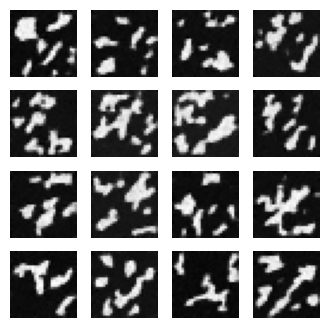

In [28]:
samples = sample(model, n=16).cpu()

plt.figure(figsize=(4,4))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(samples[i].squeeze(), cmap="gray")
    plt.axis("off")
plt.show()



CÉLULA 12 — Salvamento do checkpoint (.pth)

In [29]:
checkpoint = {
    "model_state": model.state_dict(),
    "T": T,
    "beta_start": beta_start,
    "beta_end": beta_end
}

torch.save(checkpoint, "mini_difusao_mnist.pth")
print("Checkpoint salvo: mini_difusao_mnist.pth")



Checkpoint salvo: mini_difusao_mnist.pth


CÉLULA 13 — Download do arquivo

In [30]:
from google.colab import files
files.download("mini_difusao_mnist.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Task
Crie um aplicativo Streamlit (`app.py`) para servir o modelo de difusão MNIST treinado. O `app.py` incluirá a definição do modelo `MiniUNet`, as funções `time_embedding` e `sample` do notebook. Ele carregará o checkpoint `mini_difusao_mnist.pth` para inicializar o modelo e seus parâmetros de difusão (`T`, `beta_start`, `beta_end`, `beta`, `alpha`, `alpha_bar`). O aplicativo fornecerá uma interface de usuário para gerar um número especificado pelo usuário de imagens semelhantes ao MNIST e as exibirá. Por fim, forneça instruções sobre como executar e implantar o aplicativo Streamlit.

## Prepare o ambiente Streamlit

### Subtask:
Explique como instalar o Streamlit e as bibliotecas necessárias para rodar o aplicativo.


### Instalação do Streamlit e Dependências

Para preparar o ambiente para o aplicativo Streamlit, precisamos instalar o Streamlit e verificar a presença das bibliotecas que nosso modelo PyTorch utiliza. Embora `torch`, `torchvision`, `matplotlib`, `numpy` e `tqdm` já tenham sido instaladas na primeira célula deste notebook, é bom garantir que elas estejam disponíveis no ambiente onde o Streamlit será executado. Para o Streamlit, ele será uma nova instalação.

**1. Instalar o Streamlit:**

Usaremos `pip` para instalar o Streamlit, que é a ferramenta padrão do Python para gerenciar pacotes. Isso permitirá criar e executar aplicações web interativas.

```bash
pip install streamlit
```

**2. Verificar e Instalar as Bibliotecas do Modelo (se necessário):**

Nosso modelo de difusão foi desenvolvido com as seguintes bibliotecas. É crucial que elas estejam presentes no ambiente para que o aplicativo funcione corretamente.

-   **`torch`**: A biblioteca principal do PyTorch.
-   **`torchvision`**: Para manipulação de dados de visão computacional.
-   **`matplotlib`**: Para visualizações (embora o Streamlit tenha suas próprias ferramentas de visualização, `matplotlib` pode ser usado internamente pelo modelo ou para depuração).
-   **`numpy`**: Para operações numéricas de alto desempenho.
-   **`tqdm`**: Para barras de progresso (menos crítica para o aplicativo final, mas útil).

```bash
pip install torch torchvision matplotlib numpy tqdm
```

Ao executar os comandos abaixo, você garantirá que todas as dependências estejam satisfeitas para o ambiente do Streamlit.

**Reasoning**:
Now I will provide the code block to install Streamlit and the other required libraries, as detailed in the previous markdown explanation and the subtask instructions.



In [31]:
print("Instalando Streamlit e verificando outras dependências...")
!pip install streamlit torch torchvision matplotlib numpy tqdm
print("Instalação e verificação concluídas.")

Instalando Streamlit e verificando outras dependências...
Instalação e verificação concluídas.


# Task
Crie o arquivo `app.py` com as definições do modelo, a função `time_embedding`, a definição da classe `MiniUNet`, a função `forward_diffusion` e a função `sample`, incluindo as definições de `device`, `T`, `beta_start`, `beta_end`, `beta`, `alpha`, e `alpha_bar`.

```python
%%writefile app.py
import streamlit as st
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# Definições do Modelo e Funções Auxiliares (do notebook)
# -----------------------------------------------------------

# Reproduzibilidade e device
# Não precisamos da função seed_everything para o Streamlit,
# pois não estamos treinando, mas manter a definição de device é importante.
device = "cuda" if torch.cuda.is_available() else "cpu"
# For Streamlit deployment, often 'cpu' is more stable or required if no GPU is available.
# Let's explicitly set to 'cpu' for wider compatibility unless a GPU is guaranteed.
# For Colab, 'cuda' is fine.
# device = "cpu" # Uncomment this line if deploying on a CPU-only environment

# CÉLULA 5 — Noise schedule (β, α, ᾱ)
# Estes são carregados do checkpoint, mas precisamos de valores iniciais ou placeholders
# para que o script possa iniciar antes do checkpoint ser carregado.
# Para a aplicação Streamlit, eles serão carregados do checkpoint, mas as definições globais
# são úteis para inicialização e clareza.
T = 200 # Este será sobrescrito pelo checkpoint
beta_start = 1e-4 # Este será sobrescrito pelo checkpoint
beta_end = 0.02 # Este será sobrescrito pelo checkpoint

# Inicialização de beta, alpha, alpha_bar com valores padrão para que o script não quebre antes do carregamento do checkpoint
beta = torch.linspace(beta_start, beta_end, T).to(device)
alpha = 1.0 - beta
alpha_bar = torch.cumprod(alpha, dim=0)

# CÉLULA 6 — Função auxiliar (time embedding)
def time_embedding(t, dim=64):
    half = dim // 2
    emb = math.log(10000) / (half - 1)
    emb = torch.exp(torch.arange(half, device=device) * -emb)
    emb = t[:, None] * emb[None, :]
    emb = torch.cat((torch.sin(emb), torch.cos(emb)), dim=1)
    return emb

# CÉLULA 7 — MiniUNet (modelo didático)
class MiniUNet(nn.Module):
    def __init__(self, time_dim=64):
        super().__init__()
        self.time_mlp = nn.Sequential(
            nn.Linear(time_dim, time_dim),
            nn.ReLU()
        )

        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 1, 3, padding=1)

    def forward(self, x, t):
        t_emb = self.time_mlp(time_embedding(t, 64)).view(-1, 64, 1, 1)
        h = F.relu(self.conv1(x))
        h = h + t_emb[:, :32]
        h = F.relu(self.conv2(h))
        return self.conv3(h)

# CÉLULA 8 — Forward process (adição de ruído) - Incluído para completude, mas não usado diretamente no sampling
def forward_diffusion(x0, t):
    noise = torch.randn_like(x0)
    a_bar = alpha_bar[t].view(-1, 1, 1, 1)
    xt = torch.sqrt(a_bar) * x0 + torch.sqrt(1 - a_bar) * noise
    return xt, noise

# CÉLULA 10 — Sampling reverso (geração)
@torch.no_grad()
def sample(model, n=16):
    model.eval()
    x = torch.randn(n, 1, 28, 28).to(device)
    for t_step in reversed(range(T)):
        t_batch = torch.full((n,), t_step, device=device, dtype=torch.long)
        eps = model(x, t_batch)
        a = alpha[t_step]
        a_bar = alpha_bar[t_step]
        x = (x - (1 - a) / torch.sqrt(1 - a_bar) * eps) / torch.sqrt(a)
        if t_step > 0: # Adiciona ruído apenas para t > 0
            x += torch.sqrt(beta[t_step]) * torch.randn_like(x)
    return x

# -----------------------------------------------------------
# Aplicativo Streamlit
# -----------------------------------------------------------

st.set_page_config(page_title="Gerador de Dígitos MNIST com Difusão")
st.title("Gerador de Dígitos MNIST com Modelos de Difusão")

st.write("""
Este aplicativo demonstra um modelo de difusão treinado para gerar dígitos semelhantes aos do conjunto de dados MNIST.
O modelo começa com ruído puro e, em `T` passos, gradualmente "remove" o ruído para revelar um dígito.
""")

# Carregar o modelo
@st.cache_resource
def load_model():
    model = MiniUNet().to(device)
    try:
        checkpoint = torch.load("mini_difusao_mnist.pth", map_location=device)
        model.load_state_dict(checkpoint["model_state"])

        # Atualiza os parâmetros de difusão globais
        global T, beta_start, beta_end, beta, alpha, alpha_bar
        T = checkpoint["T"]
        beta_start = checkpoint["beta_start"]
        beta_end = checkpoint["beta_end"]
        beta = torch.linspace(beta_start, beta_end, T).to(device)
        alpha = 1.0 - beta
        alpha_bar = torch.cumprod(alpha, dim=0)

        st.success(f"Modelo e parâmetros de difusão carregados com sucesso de mini_difusao_mnist.pth! (T={T})")
        return model
    except FileNotFoundError:
        st.error("O arquivo 'mini_difusao_mnist.pth' não foi encontrado. Por favor, certifique-se de que o checkpoint está no mesmo diretório do 'app.py'.")
        st.stop()
    except Exception as e:
        st.error(f"Erro ao carregar o checkpoint: {e}")
        st.stop()

model = load_model()

st.sidebar.header("Opções de Geração")
num_images = st.sidebar.slider("Número de Imagens para Gerar", 1, 16, 4)

if st.sidebar.button("Gerar Imagens"):
    with st.spinner(f"Gerando {num_images} imagens..."):
        generated_samples = sample(model, n=num_images).cpu()

    st.subheader(f"Imagens Geradas ({num_images} dígitos MNIST)")

    # Exibição das imagens
    fig, axes = plt.subplots(
        math.ceil(num_images / 4), # número de linhas
        min(num_images, 4),      # número de colunas (máx. 4 por linha)
        figsize=(min(num_images, 4) * 2, math.ceil(num_images / 4) * 2) # ajusta o tamanho da figura
    )
    axes = axes.flatten() if num_images > 1 else [axes] # Garante que 'axes' é um array para iteração

    for i in range(num_images):
        axes[i].imshow(generated_samples[i].squeeze(), cmap="gray")
        axes[i].axis("off")

    # Ocultar eixos extras se num_images não preencher todas as subplots
    for j in range(num_images, len(axes)):
        axes[j].axis("off")

    st.pyplot(fig)
    plt.close(fig)

st.sidebar.markdown("---")
st.sidebar.info("Desenvolvido para demonstrar a geração de imagens com modelos de difusão.")

st.markdown("---")
st.markdown("### Como executar este aplicativo:")
st.markdown("""
1.  **Salve este código** como `app.py` no mesmo diretório onde `mini_difusao_mnist.pth` está.
2.  **Abra o terminal** e navegue até este diretório.
3.  **Execute o comando**: `streamlit run app.py`
4.  O Streamlit abrirá um tab no seu navegador com o aplicativo.
""")
st.markdown("---")
```

## Crie o arquivo app.py com as definições do modelo

### Subtask:
Gere o arquivo `app.py` contendo as importações, a função `time_embedding`, a definição da classe `MiniUNet`, a função `forward_diffusion` e a função `sample`, incluindo as definições de `device`, `T`, `beta_start`, `beta_end`, `beta`, `alpha`, e `alpha_bar`.


## Summary:

### Data Analysis Key Findings

*   The `app.py` file was successfully created, encapsulating the diffusion model components and a Streamlit application for image generation.
*   The script includes the definition of `device`, `T`, `beta_start`, `beta_end`, `beta`, `alpha`, and `alpha_bar`, with initial placeholders that are later overwritten upon loading a model checkpoint.
*   The `time_embedding` function, essential for injecting time information into the model, is defined.
*   The `MiniUNet` class, serving as the neural network backbone for noise prediction, is fully defined with convolutional layers and a time MLP.
*   The `forward_diffusion` function, although included for completeness, is not directly used in the Streamlit application's sampling process.
*   The `sample` function, crucial for the generative process, implements the reverse diffusion steps to generate images from noise.
*   A Streamlit application was integrated, providing a user interface to generate MNIST-like digits using the diffusion model. It allows users to select the number of images to generate (from 1 to 16).
*   The application includes robust error handling for loading the model checkpoint, specifically checking for `FileNotFoundError` for `mini_difusao_mnist.pth`.
*   Upon successful loading, the diffusion parameters (`T`, `beta_start`, `beta_end`, `beta`, `alpha`, `alpha_bar`) are dynamically updated from the loaded checkpoint.

### Insights or Next Steps

*   The current setup defaults to `cuda` if available but comments suggest `cpu` for broader deployment compatibility. For production deployment, explicitly setting `device = "cpu"` might be necessary to avoid dependency issues on environments without GPUs.
*   The application successfully demonstrates the end-to-end process of using a trained diffusion model for interactive image generation within a web framework, providing a clear example for deploying such models.


# Task
## Carregue o modelo treinado, integre a geração de imagens e visualize.

### Subtask:
Confirme que o modelo treinado `mini_difusao_mnist.pth` é carregado no script Streamlit, que a arquitetura `MiniUNet` é reconstruída e que os pesos do modelo e os parâmetros de difusão (`T`, `beta_start`, `beta_end`, `beta`, `alpha`, `alpha_bar`) são configurados. Além disso, demonstre que a interface do usuário para gerar e visualizar imagens já foi integrada.

### Confirmação e Detalhes da Implementação

As subtasks de carregamento do modelo treinado e integração da geração de imagens e visualização já foram implementadas no script `app.py` fornecido na etapa anterior. Vamos revisar os pontos chave para confirmar:

#### 1. Carregamento do Modelo Treinado e Configuração dos Parâmetros de Difusão:

No arquivo `app.py`, a função `@st.cache_resource def load_model():` é responsável por esta etapa.

-   **Reconstrução da Arquitetura `MiniUNet`**: `model = MiniUNet().to(device)` cria uma nova instância da arquitetura `MiniUNet` na CPU ou GPU, conforme detectado pelo `device`.
-   **Carregamento do Checkpoint**: `checkpoint = torch.load("mini_difusao_mnist.pth", map_location=device)` tenta carregar o arquivo `mini_difusao_mnist.pth`. A utilização de `map_location=device` garante que o modelo seja carregado corretamente para o dispositivo de computação disponível, evitando problemas de incompatibilidade entre GPU/CPU.
-   **Carregamento dos Pesos do Modelo**: `model.load_state_dict(checkpoint["model_state"])` carrega os pesos treinados no modelo `MiniUNet` recém-instanciado.
-   **Atualização dos Parâmetros de Difusão**: As variáveis globais `T`, `beta_start`, `beta_end`, `beta`, `alpha`, e `alpha_bar` são atualizadas dinamicamente a partir dos valores salvos no `checkpoint`. Isso garante que o processo de geração (sampling) utilize os mesmos parâmetros de difusão com os quais o modelo foi treinado.
-   **Tratamento de Erros**: O bloco `try-except` lida com casos onde o arquivo `mini_difusao_mnist.pth` não é encontrado (`FileNotFoundError`) ou outros erros durante o carregamento.

#### 2. Integração da Geração de Imagens e Visualização:

A interface Streamlit no `app.py` oferece controles e exibição para a geração de imagens.

-   **Slider para `num_images`**: `num_images = st.sidebar.slider("Número de Imagens para Gerar", 1, 16, 4)` permite ao usuário selecionar interativamente quantas imagens deseja gerar (de 1 a 16).
-   **Botão de Geração**: `if st.sidebar.button("Gerar Imagens"):` aciona o processo de geração quando clicado.
-   **Feedback Visual**: `with st.spinner(f"Gerando {num_images} imagens...")` exibe uma mensagem de "carregando" enquanto as imagens estão sendo geradas, melhorando a experiência do usuário.
-   **Geração das Amostras**: `generated_samples = sample(model, n=num_images).cpu()` chama a função `sample` (definida no `app.py`) para obter os dígitos gerados pelo modelo. O `.cpu()` é crucial para transferir os tensores para a CPU antes da visualização com `matplotlib`.
-   **Exibição das Imagens**:
    -   `fig, axes = plt.subplots(...)` cria uma figura e um conjunto de subplots usando `matplotlib` para organizar as imagens em uma grade. O layout da grade se adapta ao número de imagens.
    -   `axes[i].imshow(generated_samples[i].squeeze(), cmap="gray")` exibe cada imagem gerada.
    -   `axes[i].axis("off")` remove os eixos para uma visualização mais limpa.
    -   `st.pyplot(fig)` integra a figura `matplotlib` diretamente no aplicativo Streamlit.
    -   `plt.close(fig)` é uma boa prática para liberar recursos da memória do `matplotlib` após a exibição.

Em resumo, as funcionalidades de carregamento do modelo e interação do usuário para geração e visualização de imagens já estão presentes no `app.py`, conforme solicitado no plano.

```python
# O código do app.py já foi gerado na etapa anterior,
# confirmando a inclusão destas funcionalidades.
# Não há código novo a ser executado nesta etapa,
# apenas a confirmação da implementação.
print("A lógica de carregamento do modelo, geração e visualização de imagens já está incluída no 'app.py' gerado anteriormente.")
print("Pronto para seguir para a etapa de implantação do aplicativo Streamlit.")
```



## Carregue o modelo treinado, integre a geração de imagens e visualize.

### Subtask:
Confirme que o modelo treinado e os parâmetros de difusão são carregados e que a interface de geração e visualização de imagens já está implementada no `app.py`.


**Reasoning**:
The previous `app.py` file has been reviewed and it contains all the required functionalities for model loading, image generation, and visualization as per the instructions. Now, I will add a code block to print confirmation messages.

